
================ GABC: KHỞI TẠO ================
  X0 = [0.54342028 1.94461869], f(X0) = 3.2115
  X1 = [0.84216927 1.68469237], f(X1) = 3.1243
  X2 = [1.37775888 2.34338354], f(X2) = 3.2606
  → Global best ban đầu: [0.84216927 1.68469237] , f = 3.1243294403004804
Iteration  1: global best f(x) = 3.060492, gbest = [0.84216927 1.81137028]
Iteration  2: global best f(x) = 3.055347, gbest = [0.85420875 2.1846386 ]
Iteration  3: global best f(x) = 3.049187, gbest = [0.78524503 1.94461869]
Iteration  4: global best f(x) = 3.046898, gbest = [0.79064078 1.94461869]
Iteration  5: global best f(x) = 3.046898, gbest = [0.79064078 1.94461869]
Iteration  6: global best f(x) = 3.014545, gbest = [0.88083104 2.01852755]
Iteration  7: global best f(x) = 3.014234, gbest = [0.88083104 2.00575633]
Iteration  8: global best f(x) = 3.013271, gbest = [0.88494558 2.00575633]
Iteration  9: global best f(x) = 3.013268, gbest = [0.88494558 2.00548978]
Iteration 10: global best f(x) = 3.007629, gbest = [0.912743

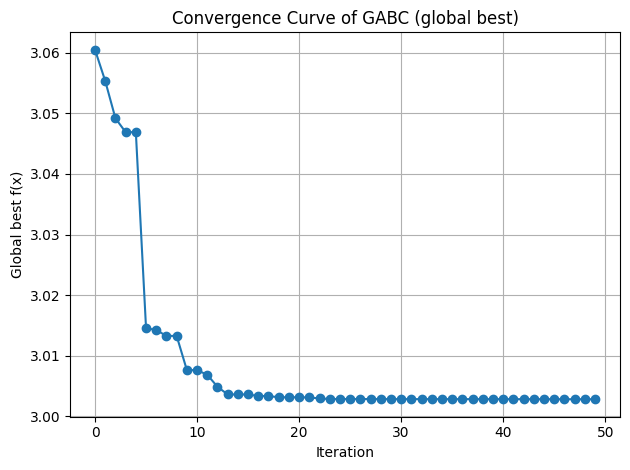

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# ============================
#  THUẬT TOÁN GABC (có global_best)
# ============================
start = time.time()

N = 6
D = 2
SN = N // 2
LIMIT = (N * D) // 2
MAX_ITER = 50

bounds = np.array([
    [0.5, 1.5],
    [1.5, 2.5]
])

# Sinh ngẫu nhiên nguồn thức ăn ban đầu
food_sources = np.zeros((SN, D))
for i in range(SN):
    for j in range(D):
        min_j, max_j = bounds[j]
        food_sources[i, j] = min_j + np.random.rand() * (max_j - min_j)

trial = np.zeros(SN, dtype=int)

# Hàm mục tiêu
def objective(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2 + 3

# Fitness
def fitness_func(f):
    return 1 / (1 + f) if f >= 0 else 1 + abs(f)


# ======================================
# SINH NGHIỆM MỚI GABC (dùng gbest)
# ======================================
def generate_new_solution_GABC(i, gbest):
    # Chọn 1 chiều
    k = np.random.randint(D)
    # Chọn 1 nguồn khác
    j = np.random.choice([a for a in range(SN) if a != i])

    phi = np.random.uniform(-1, 1)
    psi = np.random.uniform(0, 1.5)        # Hệ số kéo về nghiệm tốt nhất

    v = food_sources[i].copy()

    # Công thức GABC:
    v[k] = v[k] + phi * (v[k] - food_sources[j][k]) \
                  + psi * (gbest[k] - v[k])

    # Giữ trong miền
    v = np.clip(v, bounds[:, 0], bounds[:, 1])
    return v


# ======================================
# KHỞI TẠO FITNESS + GLOBAL BEST
# ======================================
fitness = np.array([fitness_func(objective(x)) for x in food_sources])

best_idx = np.argmax(fitness)
global_best_x = food_sources[best_idx].copy()
global_best_f = objective(global_best_x)

history_gabc = []

print("\n================ GABC: KHỞI TẠO ================")
for i, fs in enumerate(food_sources):
    print(f"  X{i} = {fs}, f(X{i}) = {objective(fs):.4f}")
print("  → Global best ban đầu:", global_best_x, ", f =", global_best_f)


# ======================================
# VÒNG LẶP CHÍNH GABC
# ======================================
for iteration in range(1, MAX_ITER + 1):

    # ========== Employed bees ==========
    for i in range(SN):
        v = generate_new_solution_GABC(i, global_best_x)

        f_new = objective(v)
        f_old = objective(food_sources[i])
        fit_new = fitness_func(f_new)
        fit_old = fitness_func(f_old)

        if fit_new > fit_old:
            food_sources[i] = v
            fitness[i] = fit_new
            trial[i] = 0
        else:
            trial[i] += 1

    # ========== Onlooker bees ==========
    prob = fitness / np.sum(fitness)

    for _ in range(SN):
        i = np.random.choice(range(SN), p=prob)
        v = generate_new_solution_GABC(i, global_best_x)

        f_new = objective(v)
        f_old = objective(food_sources[i])
        fit_new = fitness_func(f_new)
        fit_old = fitness_func(f_old)

        if fit_new > fit_old:
            food_sources[i] = v
            fitness[i] = fit_new
            trial[i] = 0
        else:
            trial[i] += 1

    # ========== Scout bees ==========
    for i in range(SN):
        if trial[i] > LIMIT:
            for j in range(D):
                min_j, max_j = bounds[j]
                food_sources[i][j] = min_j + np.random.rand() * (max_j - min_j)
            trial[i] = 0
            fitness[i] = fitness_func(objective(food_sources[i]))

    # ========== CẬP NHẬT GLOBAL BEST ==========
    best_idx = np.argmax(fitness)
    current_best_x = food_sources[best_idx].copy()
    current_best_f = objective(current_best_x)

    if current_best_f < global_best_f:
        global_best_f = current_best_f
        global_best_x = current_best_x.copy()

    history_gabc.append(global_best_f)
    print(f"Iteration {iteration:2d}: global best f(x) = {global_best_f:.6f}, gbest = {global_best_x}")

end = time.time()

print("\n=== KẾT QUẢ CUỐI CÙNG (GABC) ===")
print("Global best ≈", global_best_x)
print("f(Global best) ≈", global_best_f)
print(f"Thời gian chạy GABC: {end - start:.6f} giây")

# ======================================
# VẼ ĐỒ THỊ HỘI TỤ GABC
# ======================================
plt.plot(history_gabc, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Global best f(x)")
plt.title("Convergence Curve of GABC (global best)")
plt.grid(True)
plt.tight_layout()
plt.show()
